In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [46]:
data = pd.read_csv('aml.csv')
data.head()

,ALERT,SAR,kycRiskScore,income,tenureMonths,creditScore,state,nbrPurchases90d,avgTxnSize90d,totalSpend90d,...,indCustReqRefund90d,totalRefundsToCust90d,nbrPaymentsCashLike90d,maxRevolveLine,indOwnsHome,nbrInquiries1y,nbrCollections3y,nbrWebLogins90d,nbrPointRed90d,PEP
0,1,0,3,110300.0,5,757,PA,10,153.80,1538.00,...,1,45.82,5,6000,0,3,0,6,1,0
1,1,0,2,107800.0,6,715,NY,22,1.59,34.98,...,1,67.40,0,10000,1,3,0,87,0,0
2,1,0,1,74000.0,13,751,MA,7,57.64,403.48,...,1,450.69,0,10000,0,3,0,6,0,0
3,1,0,0,57700.0,1,659,NJ,14,29.52,413.28,...,1,71.43,0,8000,1,5,0,7,2,0
4,1,0,1,59800.0,3,709,PA,54,115.77,6251.58,...,1,2731.39,3,7000,1,1,0,8,1,0


In [47]:
data.describe()

,ALERT,SAR,kycRiskScore,income,tenureMonths,creditScore,nbrPurchases90d,avgTxnSize90d,totalSpend90d,nbrDistinctMerch90d,...,indCustReqRefund90d,totalRefundsToCust90d,nbrPaymentsCashLike90d,maxRevolveLine,indOwnsHome,nbrInquiries1y,nbrCollections3y,nbrWebLogins90d,nbrPointRed90d,PEP
count,10000.0,10000.000000,10000.00000,9800.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,...,10000.0,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.0,0.102600,1.40790,51471.173469,20.316800,712.851500,26.074900,149.674754,4.019318e+03,13.00890,...,1.0,508.909111,1.57240,12024.000000,0.599700,2.978100,0.120500,7.991400,0.999100,0.000300
std,0.0,0.303451,1.06058,39801.443212,20.682249,38.316397,40.338798,194.314668,1.631919e+04,20.26242,...,0.0,8667.235341,1.95825,3816.527294,0.489984,1.727981,0.350702,8.609224,0.945827,0.017319
min,1.0,0.000000,0.00000,0.000000,0.000000,554.000000,0.000000,0.000000,0.000000e+00,0.00000,...,1.0,0.000000,0.00000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,1.00000,22200.000000,6.000000,687.000000,4.000000,28.422500,1.599775e+02,2.00000,...,1.0,39.257500,0.00000,9000.000000,0.000000,2.000000,0.000000,5.000000,0.000000,0.000000
50%,1.0,0.000000,1.00000,41600.000000,14.000000,714.000000,12.000000,82.585000,8.100500e+02,6.00000,...,1.0,55.925000,0.00000,12000.000000,1.000000,3.000000,0.000000,7.000000,1.000000,0.000000
75%,1.0,0.000000,2.00000,71000.000000,28.000000,739.000000,32.000000,197.067500,3.203580e+03,16.00000,...,1.0,73.322500,3.00000,14000.000000,1.000000,4.000000,0.000000,9.000000,2.000000,0.000000
max,1.0,1.000000,6.00000,344700.000000,232.000000,800.000000,766.000000,2315.440000,1.218719e+06,362.00000,...,1.0,845158.580000,10.00000,34000.000000,1.000000,11.000000,4.000000,97.000000,5.000000,1.000000


In [48]:
data.isnull().sum()

ALERT                                 0
SAR                                   0
kycRiskScore                          0
income                              200
tenureMonths                          0
creditScore                           0
state                                 0
nbrPurchases90d                       0
avgTxnSize90d                         0
totalSpend90d                         0
csrNotes                              0
nbrDistinctMerch90d                   0
nbrMerchCredits90d                    0
nbrMerchCreditsRndDollarAmt90d        0
totalMerchCred90d                     0
nbrMerchCreditsWoOffsettingPurch      0
nbrPayments90d                        0
totalPaymentAmt90d                    0
overpaymentAmt90d                     0
overpaymentInd90d                     0
nbrCustReqRefunds90d                  0
indCustReqRefund90d                   0
totalRefundsToCust90d                 0
nbrPaymentsCashLike90d                0
maxRevolveLine                        0


In [49]:
data.dropna(inplace=True)

In [50]:
data.isnull().sum()

ALERT                               0
SAR                                 0
kycRiskScore                        0
income                              0
tenureMonths                        0
creditScore                         0
state                               0
nbrPurchases90d                     0
avgTxnSize90d                       0
totalSpend90d                       0
csrNotes                            0
nbrDistinctMerch90d                 0
nbrMerchCredits90d                  0
nbrMerchCreditsRndDollarAmt90d      0
totalMerchCred90d                   0
nbrMerchCreditsWoOffsettingPurch    0
nbrPayments90d                      0
totalPaymentAmt90d                  0
overpaymentAmt90d                   0
overpaymentInd90d                   0
nbrCustReqRefunds90d                0
indCustReqRefund90d                 0
totalRefundsToCust90d               0
nbrPaymentsCashLike90d              0
maxRevolveLine                      0
indOwnsHome                         0
nbrInquiries

In [51]:
data.duplicated().sum()

0

In [52]:
data = data[['ALERT','SAR','kycRiskScore', 'income', 'tenureMonths', 'creditScore', 'state', 'nbrPurchases90d','avgTxnSize90d', 'totalSpend90d', 'nbrPayments90d', 'totalPaymentAmt90d', 'nbrInquiries1y', 'nbrCollections3y', 'nbrWebLogins90d', 'PEP']]
data.head()

,ALERT,SAR,kycRiskScore,income,tenureMonths,creditScore,state,nbrPurchases90d,avgTxnSize90d,totalSpend90d,nbrPayments90d,totalPaymentAmt90d,nbrInquiries1y,nbrCollections3y,nbrWebLogins90d,PEP
0,1,0,3,110300.0,5,757,PA,10,153.80,1538.00,5,76.90,3,0,6,0
1,1,0,2,107800.0,6,715,NY,22,1.59,34.98,4,60.00,3,0,87,0
2,1,0,1,74000.0,13,751,MA,7,57.64,403.48,4,796.63,3,0,6,0
3,1,0,0,57700.0,1,659,NJ,14,29.52,413.28,3,413.28,5,0,7,0
4,1,0,1,59800.0,3,709,PA,54,115.77,6251.58,3,8928.41,1,0,8,0


In [53]:
data.describe()

,ALERT,SAR,kycRiskScore,income,tenureMonths,creditScore,nbrPurchases90d,avgTxnSize90d,totalSpend90d,nbrPayments90d,totalPaymentAmt90d,nbrInquiries1y,nbrCollections3y,nbrWebLogins90d,PEP
count,9800.0,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9.800000e+03,9800.000000,9.800000e+03,9800.000000,9800.000000,9800.000000,9800.000000
mean,1.0,0.102653,1.406735,51471.173469,20.355612,712.913469,26.134490,149.635348,4.042264e+03,3.729898,3.482387e+03,2.977551,0.121531,8.013469,0.000306
std,0.0,0.303521,1.060414,39801.443212,20.726280,38.308083,40.483221,193.914695,1.646463e+04,1.453081,2.304559e+04,1.726860,0.352307,8.687615,0.017495
min,1.0,0.000000,0.000000,0.000000,0.000000,554.000000,0.000000,0.000000,0.000000e+00,2.000000,6.000000e+01,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,1.000000,22200.000000,6.000000,687.000000,4.000000,28.370000,1.603550e+02,3.000000,6.138500e+01,2.000000,0.000000,5.000000,0.000000
50%,1.0,0.000000,1.000000,41600.000000,14.000000,714.000000,12.000000,82.585000,8.117800e+02,3.000000,5.463500e+02,3.000000,0.000000,7.000000,0.000000
75%,1.0,0.000000,2.000000,71000.000000,28.000000,739.000000,32.000000,197.157500,3.219222e+03,5.000000,2.764335e+03,4.000000,0.000000,9.000000,0.000000
max,1.0,1.000000,6.000000,344700.000000,232.000000,800.000000,766.000000,2315.440000,1.218719e+06,12.000000,2.063841e+06,11.000000,4.000000,97.000000,1.000000


In [54]:
# applying label encoding 
label_encoder=LabelEncoder()
data['state_encoded'] = label_encoder.fit_transform(data['state'])
numerical_cols = ['income', 'tenureMonths', 'creditScore', 'nbrPurchases90d', 'avgTxnSize90d', 
                  'totalSpend90d', 'nbrPayments90d', 'totalPaymentAmt90d', 'nbrInquiries1y', 
                  'nbrCollections3y', 'nbrWebLogins90d','kycRiskScore','state_encoded']

# normalizing the code 
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data = data[['ALERT','SAR','kycRiskScore', 'income', 'tenureMonths', 'creditScore', 'state_encoded', 'nbrPurchases90d','avgTxnSize90d', 'totalSpend90d', 'nbrPayments90d', 'totalPaymentAmt90d', 'nbrInquiries1y', 'nbrCollections3y', 'nbrWebLogins90d', 'PEP']]

# Display the normalized data
data.head()

,ALERT,SAR,kycRiskScore,income,tenureMonths,creditScore,state_encoded,nbrPurchases90d,avgTxnSize90d,totalSpend90d,nbrPayments90d,totalPaymentAmt90d,nbrInquiries1y,nbrCollections3y,nbrWebLogins90d,PEP
0,1,0,0.500000,0.319988,0.021552,0.825203,0.750,0.013055,0.066424,0.001262,0.3,0.000008,0.272727,0.0,0.061856,0
1,1,0,0.333333,0.312736,0.025862,0.654472,0.625,0.028721,0.000687,0.000029,0.2,0.000000,0.272727,0.0,0.896907,0
2,1,0,0.166667,0.214679,0.056034,0.800813,0.125,0.009138,0.024894,0.000331,0.2,0.000357,0.272727,0.0,0.061856,0
3,1,0,0.000000,0.167392,0.004310,0.426829,0.500,0.018277,0.012749,0.000339,0.1,0.000171,0.454545,0.0,0.072165,0
4,1,0,0.166667,0.173484,0.012931,0.630081,0.750,0.070496,0.049999,0.005130,0.1,0.004297,0.090909,0.0,0.082474,0


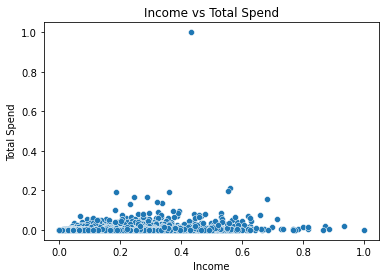

In [55]:
# Scatter plot of 'income' vs 'totalSpend90d'
sns.scatterplot(x='income', y='totalSpend90d', data=data)
plt.title('Income vs Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.show()

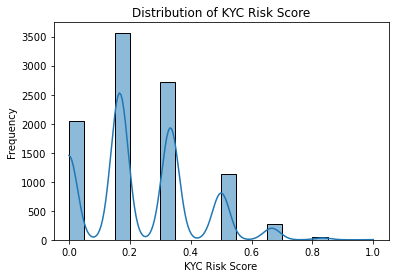

In [56]:
sns.histplot(data['kycRiskScore'], bins=20, kde=True)
plt.title('Distribution of KYC Risk Score')
plt.xlabel('KYC Risk Score')
plt.ylabel('Frequency')
plt.show()


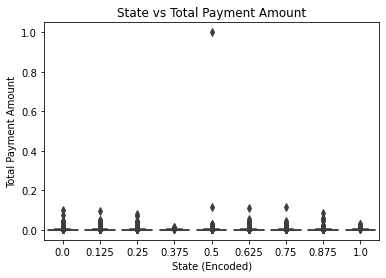

In [57]:
# Box plot of 'state_encoded' vs 'totalPaymentAmt90d'
sns.boxplot(x='state_encoded', y='totalPaymentAmt90d', data=data)
plt.title('State vs Total Payment Amount')
plt.xlabel('State (Encoded)')
plt.ylabel('Total Payment Amount')
plt.show()


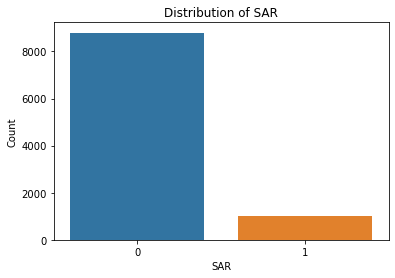

In [58]:
# Bar plot of 'SAR' counts
sns.countplot(x='SAR', data=data)
plt.title('Distribution of SAR')
plt.xlabel('SAR')
plt.ylabel('Count')
plt.show()


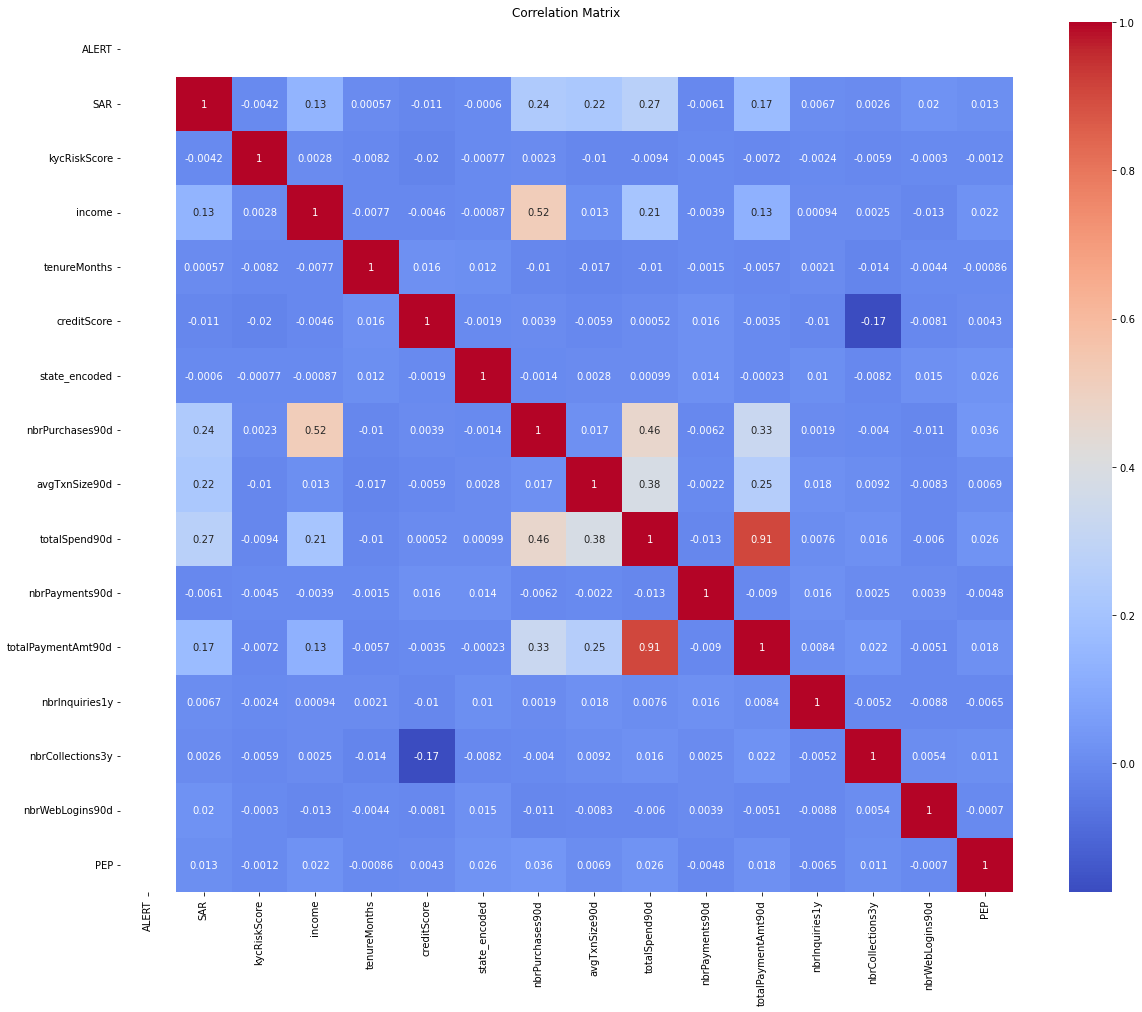

In [62]:
# Correlation matrix
plt.figure(figsize=(20,16))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

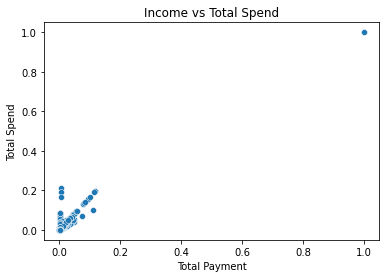

In [63]:
# Scatter plot of 'income' vs 'totalSpend90d'
sns.scatterplot(x='totalPaymentAmt90d', y='totalSpend90d', data=data)
plt.title('Income vs Total Spend')
plt.xlabel('Total Payment')
plt.ylabel('Total Spend')
plt.show()

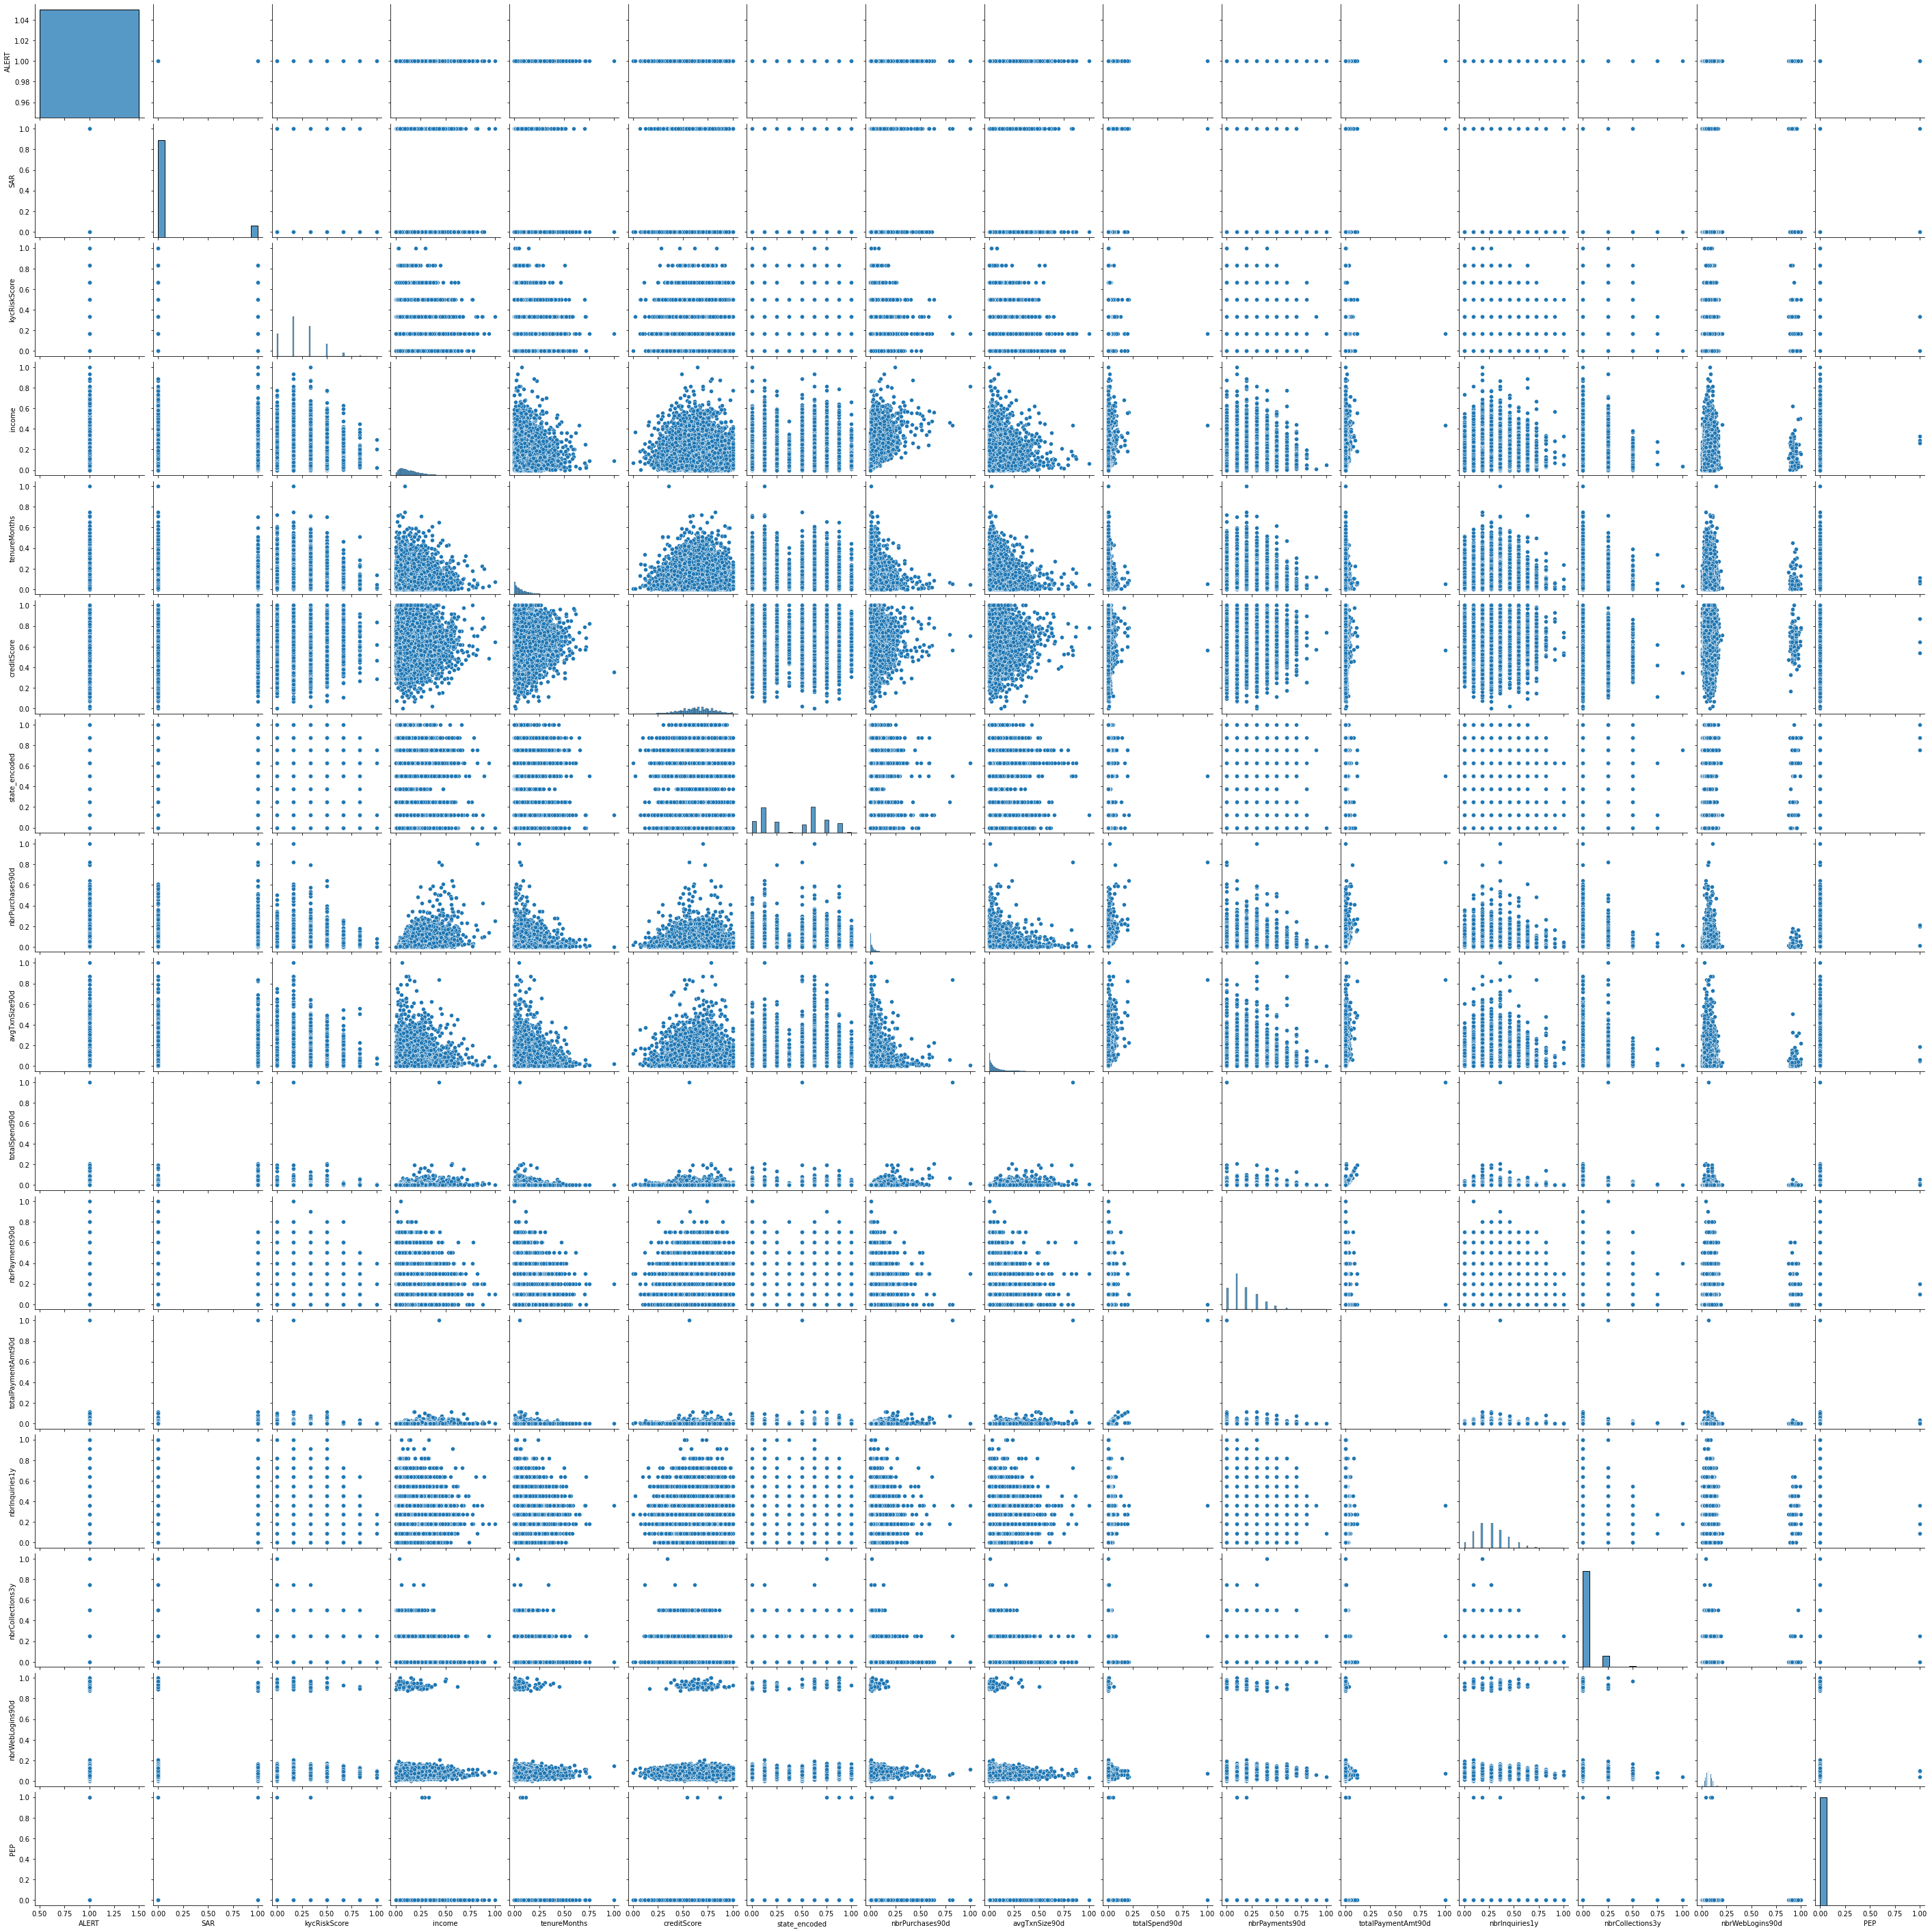

In [60]:
sns.pairplot(data)

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the data

# Split data into features (X) and target (y)
X = data.drop(columns=['SAR'])  # Exclude the 'SAR' column as it's the target variable
y = data['SAR']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 8  # Adjust the size of the encoding layer as needed

input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = Dense(input_dim, activation='relu')(encoder_layer)

autoencoder = Model(input_layer, decoder_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Evaluate the model
encoded_X_train = autoencoder.predict(X_train)
encoded_X_test = autoencoder.predict(X_test)

# Calculate reconstruction error
train_mse = np.mean(np.power(X_train - encoded_X_train, 2), axis=1)
test_mse = np.mean(np.power(X_test - encoded_X_test, 2), axis=1)

# Define a threshold for anomaly detection
threshold = np.mean(train_mse) + 3 * np.std(train_mse)  # Adjust as needed

# Detect anomalies
anomalies = test_mse > threshold

# Print anomalies
print("Anomalies Detected:")
print(anomalies)

# Convert boolean array 'anomalies' to binary labels (1 for anomaly, 0 for normal)
predicted_labels = anomalies.astype(int)

# Calculate accuracy
accuracy = np.mean(predicted_labels == y_test)
print("Accuracy:", accuracy)

Epoch 1/50
245/245 [==============================] - 1s 3ms/step - loss: 0.8467 - val_loss: 0.9831
Epoch 2/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6995 - val_loss: 0.8776
Epoch 3/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6059 - val_loss: 0.8158
Epoch 4/50
245/245 [==============================] - 0s 2ms/step - loss: 0.5653 - val_loss: 0.7916
Epoch 5/50
245/245 [==============================] - 0s 2ms/step - loss: 0.5389 - val_loss: 0.7628
Epoch 6/50
245/245 [==============================] - 0s 2ms/step - loss: 0.5041 - val_loss: 0.7425
Epoch 7/50
245/245 [==============================] - 0s 2ms/step - loss: 0.4877 - val_loss: 0.7332
Epoch 8/50
245/245 [==============================] - 0s 2ms/step - loss: 0.4775 - val_loss: 0.7272
Epoch 9/50
245/245 [==============================] - 1s 2ms/step - loss: 0.4700 - val_loss: 0.7228
Epoch 10/50
245/245 [==============================] - 0s 2ms/step - loss: 0.4643 - val_loss: 0.7196

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the data

# Split data into features (X) and target (y)
X = data.drop(columns=['SAR'])  # Exclude the 'SAR' column as it's the target variable
y = data['SAR']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train One-Class SVM model
svm_model = OneClassSVM(nu=0.05)  # Adjust the 'nu' parameter as needed
svm_model.fit(X_train)

# Predict anomalies in the test set
anomalies = svm_model.predict(X_test)

# Convert predictions to binary labels (1 for anomaly, -1 for normal)
predicted_labels = np.where(anomalies == -1, 1, 0)

# Evaluate the model
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
roc_auc = roc_auc_score(y_test, predicted_labels)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC score:", roc_auc)

Accuracy: 0.8714285714285714
Precision: 0.2815533980582524
Recall: 0.14009661835748793
F1-score: 0.1870967741935484
ROC AUC score: 0.5489416349060685


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the data

# Split data into features (X) and target (y)
X = data.drop(columns=['SAR'])  # Exclude the 'SAR' column as it's the target variable
y = data['SAR']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Local Outlier Factor model
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Adjust parameters as needed
y_pred = lof_model.fit_predict(X_train)

# Convert predictions to binary labels (1 for anomaly, -1 for normal)
predicted_labels = np.where(y_pred == -1, 1, 0)

# Evaluate the model
accuracy = accuracy_score(y_train, predicted_labels)
precision = precision_score(y_train, predicted_labels)
recall = recall_score(y_train, predicted_labels)
f1 = f1_score(y_train, predicted_labels)
roc_auc = roc_auc_score(y_train, predicted_labels)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC score:", roc_auc)

Accuracy: 0.8730867346938775
Precision: 0.25
Recall: 0.12265331664580725
F1-score: 0.16456759026028547
ROC AUC score: 0.5404489420894141


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the data

# Split data into features (X) and target (y)
X = data.drop(columns=['SAR'])  # Exclude the 'SAR' column as it's the target variable
y = data['SAR']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
isolation_forest.fit(X_train)

# Predict anomalies in the test set
anomalies = isolation_forest.predict(X_test)

# Convert predictions to binary labels (1 for anomaly, -1 for normal)
predicted_labels = np.where(anomalies == -1, 1, 0)

# Evaluate the model
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
roc_auc = roc_auc_score(y_test, predicted_labels)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC score:", roc_auc)

Accuracy: 0.8948979591836734
Precision: 0.5050505050505051
Recall: 0.24154589371980675
F1-score: 0.32679738562091504
ROC AUC score: 0.6067969057874562


Epoch 1/50
245/245 [==============================] - 1s 3ms/step - loss: 0.7870 - val_loss: 0.9483
Epoch 2/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6658 - val_loss: 0.8734
Epoch 3/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6095 - val_loss: 0.8357
Epoch 4/50
245/245 [==============================] - 0s 2ms/step - loss: 0.5619 - val_loss: 0.7856
Epoch 5/50
245/245 [==============================] - 0s 2ms/step - loss: 0.5091 - val_loss: 0.7594
Epoch 6/50
245/245 [==============================] - 0s 2ms/step - loss: 0.4684 - val_loss: 0.7306
Epoch 7/50
245/245 [==============================] - 1s 2ms/step - loss: 0.4304 - val_loss: 0.7092
Epoch 8/50
245/245 [==============================] - 0s 2ms/step - loss: 0.4073 - val_loss: 0.6995
Epoch 9/50
245/245 [==============================] - 0s 2ms/step - loss: 0.3942 - val_loss: 0.6948
Epoch 10/50
245/245 [==============================] - 1s 2ms/step - loss: 0.3847 - val_loss: 0.6914

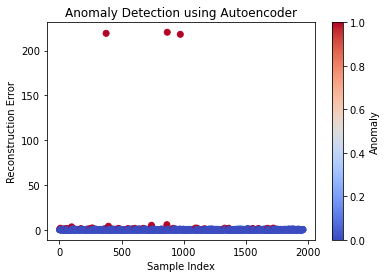

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the data

# Split data into features (X) and target (y)
X = data.drop(columns=['SAR'])  # Exclude target columns
y = data['SAR']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 8  # Adjust the size of the encoding layer as needed

input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = Dense(input_dim, activation='relu')(encoder_layer)

autoencoder = Model(input_layer, decoder_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Evaluate the model
encoded_X_train = autoencoder.predict(X_train)
encoded_X_test = autoencoder.predict(X_test)

# Calculate reconstruction error
train_mse = np.mean(np.power(X_train - encoded_X_train, 2), axis=1)
test_mse = np.mean(np.power(X_test - encoded_X_test, 2), axis=1)

# Define a threshold for anomaly detection
threshold = np.mean(train_mse) + 3 * np.std(train_mse)  # Adjust as needed

# Detect anomalies
anomalies = test_mse > threshold

# Visualize anomalies
plt.scatter(np.arange(len(test_mse)), test_mse, c=anomalies, cmap='coolwarm')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection using Autoencoder')
plt.colorbar(label='Anomaly')
plt.show()